# The Harris-Todaro Model
## Migration, urban-bias, and the informal sector

>Harris, J.R., Todaro, M.P., 1970. Migration, unemployment and development: a two-sector analysis. *The American Economic Review* 126–142.


This remains one of the most cited and influential papers in development economics (with [10700+](https://scholar.google.com/scholar?cites=8165441532168440908&as_sdt=5,33&sciodt=0,33&hl=en) google scholar citations). It's perhaps partly due to its elegant simplicity -- a simple clever variation on an otherwise quite neo-classical model delivers a rich model of economic migration, that also helps understand dualism and an urban informal sector. Appearing as it did in 1970 it also came to form part of the critique of some import-substituting industrialization (ISI) policies, particularly those in Latin America which critics felt were artificially protecting capital-intensive 'modern' industries (e.g. car manufacture) in urban areas.  This generated economic rents for its owners and the workers lucky enough to capture high-paying jobs in those industries who then often became politically organized to keep protections in place.  The Harris-Todaro model demonstrated possible unintended general equilibrium consequences of such policies, including urban-bias leading to rapid inefficient urbanization and the growth of the urban informal sector.

This model adapts a standard open-economy two-sector specific factors model (SFM) to study impediments and frictions in the structural transformation process.  

* The two sectors are agriculture and 'modern-manufacturing'
* Labor is mobile across the two sectors. The agricultural labor market is competitive. 

If the labor market in the modern manufacturing sector were competitive this would be a standard model and labor would move until the wage was equalized across sector to a common market-clearing equilibrium wage $w^e$, at which point the sum of labor demands from each sector would equal the economy-wide labor supply $\bar L$.

$$L_a (w^e) + L_m (w^e) = \bar L $$

The model assumes instead that for institutional/political economy reasons, wages in one part of urban sector are set artificially high, maybe because of union activity or minimum-wage policies (in a policy environment where the sector may be receiving trade protection), or perhaps for efficiency-wage considerations (Shapiro, Stiglitz, 1984). This institutionally imposed high wage will lead firms in that sector to cut back hiring but the possibility of landing one of these high-prized jobs may also serve to attract migrants to urban areas.  

Laborers can now either stay in the rural sector to earn wage equilibrium rural wage $w_r$ or migrate to the urban area where they may land either in 

  (a) the informal sector where they earn a low-productivity determined wage $w_u$ or 
  
  (b) in the high-wage modern manufacturing sector where they earn the institutionally-determined wage $w_m$. 
  
  The model assumes only urban dwellers can apply for modern-manufacturing and that jobs will be allocated via a lottery whenever jobs are in excess demand. 

  Depending on economic conditions the equilibrium outcome may be either inefficiently low migration or, under difference circumstances, an inefficiently large urban sector and 'urban-bias' (a larger than efficient urban with a large informal sector).  

### Equilibrium migration

Without loss of generality and to simplify let's call $p = \frac{P_r}{P_m}$ the relative price of agricultural goods. 

The rural labor demand $L_r(w)$ function is derived from

$$p \cdot F_L(\bar T, L_r) = w$$

and modern manufacturing sector labor demand $L_m(w)$ from

$$G_L(\bar K, L_m) = w$$

The modern manufacturing sector wage $w_m$ will be fixed and set institutionally, so we can determine labor demand by $L_m = L_m(w_m)$.

The urban underemployed earn livelihoods from a fall-back survival technology that pays them a low fixed $w_u$ per unit of labor. The amount of labor $L_u$ that flows into this sector will be endogenous: earnings in this sector will be lower than in the rural sector in equilibrium but the sector nonetheless attracts migrants as a staging ground for possibly capturing a position in the high wage modern sector.

In equilibrium, labor in the urban formal and informal sector plus rural labor must add up to available supply.
$$
L_m + L_u + L_r = \bar L
$$

The high-wage manufacturing sector are allocated by fair lottery the equilibium probability of getting such a job will be given simply by the share of the urban sector labor force in that sector. Migration will take place until the rural wage is equalized to the *expected* wage of an urban resident:

$$w_r = \frac{L_m (w_m)}{L_u + L_m (w_m)} \cdot w_m  + \frac{L_u}{L_u + L_m (w_m)} \cdot w_u $$

To get the simplest solutions, let's first normalize the informal sector wage $w_u=0$ (we'll change that later). The condition then simplifies to:

$$w_r = \frac{L_m (w_m)}{L_u + L_m (w_m)} \cdot w_m  $$

As $w_m$ is set exogenously, labor use in the modern manufacturing sector will also be fixed at $L_m (w_m)$.  Using this fact and that $(L_u+L_m = \bar L - L_r)$, th condition can be re-written as:

$$ w_m \cdot L_m = w_r \cdot ({\bar L  - L_r})  $$

As $\bar L$, $w_m$ and $L_m = L_m(w_m)$ are all fixed quantities, this is an equation in two unknowns $w_r$ and $L_r$. We can solve for the two unknowns from a system of two equations. 

The first is this last equation which is a rectangular hyperbola of the form $x \cdot y = \kappa$, where here $x = \bar L - L_r$ and $y = w_r$).  

The other equation is the rural competitive factor pricing condition 

$$p \cdot F_L(\bar K_r, L_r) = w_r$$

###  Diagram analysis

Although this is a simple system of just two non-linear equations, it's hard to get tidy closed form solutions for Cobb Douglas production functions. It is however easy to see the solution graphically and solve for it numerically. 

Production in the agricultural and manufacturing are carried out by identical firms in each sector each employing the linear homogenous Cobb-Douglas technologies:

$$G(\bar T, L_r)=A_r \bar T^{\alpha} \cdot  L_r^{1-\alpha}$$

$$F(\bar K, L_m)=A_m \bar K^{\beta} \cdot  L_m^{1-\beta}$$

Labor demand in manufacturing as a function of $w$:

$$L_m(w_m) = \left [ { \frac{A_m (1-\beta) \bar K}{w_m/P_m} } \right ]^\frac{1}{\beta} $$


and rural labor demand:

$$L_r(w_r) = \left [ { \frac{A_r (1-\alpha) \bar T}{w_r/P_r} } \right ]^\frac{1}{\alpha} $$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.optimize import bisect, fsolve, newton
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

Let's fix ideas, let's set some parameters for this economy:

In [2]:
Tbar = 200       # Fixed specific land in ag. 
Kbar = 200       # Fixed specific capital in manuf
Lbar = 400       # Total number of mobile workers
LbarMax = 400    # Lbar will be on slider, max value.
Ar, Am  = 1, 1
p    = 1.00      # initial rel price of ag goods, p = Pa/Pm
alpha, beta = 0.5, 0.5  # labor share in ag, manuf

In [3]:
def F(L,T, A=Ar, alpha=alpha):
    return A*(T**alpha)*(L**(1-alpha))

def G(L, K, A=Am, beta=beta):
    return A*(K**beta)*(L**(1-beta))

def mplr(L,T=Tbar, A=Ar, alpha=alpha):
    return (1-alpha)*F(L,T,A,alpha)/L

def mplm(L, K=Kbar, A=Am, beta=beta):
    return (1-beta)*G(L,K,A,beta)/L

def Lm(w, Kbar=Kbar, A=Am, beta=beta):
    return  Kbar*((p/w)*(A*(1-beta)))**(1/beta)

def expret(Lr, wm):
    return wm*Lm(wm)/(Lbar-Lr)

def expwage(Lr, wm, wu):
    return (wm*Lm(wm) + wu*(Lbar-Lm(wm)-Lr) )/(Lbar-Lr)

The **efficient competitive equilibrium** is given by the point where these two labor demand curves intersect. We solve for the level of agricultural employment at which there is zero excess demand for agricultural labor. This gives an equilibrium agricultural labor demand economy-wide equilibrium wage.

In [4]:
def effeq():
    '''Find efficient market equilibrium and labor allocation'''
    ed = lambda L: mplr(L,Tbar,Ar,alpha) - mplm(Lbar-L, Kbar, Am, beta)
    L = Lbar/2   # guess
    LE = fsolve(ed, L)[0]
    return mplr(LE,Tbar,Ar,alpha), LE

A Harris-Todaro equilibrium is one where the rural wage equals the expected urban wage.  Diagramatically the equilibrium level of rural employtment is given by the intersection of the rural labor demand curve and the rectangular hyperbola running through $(w_m, L_m(w_m))$.

In [5]:
def harristodaro(wm, wu):
    LM = Lm(wm)
    WE, LE = effeq()
    hteq = lambda L: mplr(L) - (wm*LM + wu*(Lbar-LM-L) )/(Lbar-L)
    L = Lbar/2
    LR = fsolve(hteq, L)[0]
    WR =  mplr(LR)
    return WR, LR, LM, WE, LE

def gdpratio(wm, wu):
    '''Returns actual gdp as percent of efficient potential.'''
    WR, LR, LM, WE, LE = harristodaro(wm, wu)
    gdpe = F(LE, Tbar, Ar, alpha) + p * G(Lbar-LE, Kbar, Am, beta)
    gdp =  F(LR, Tbar, Ar, alpha) + p * G(LM, Kbar, Am,  beta) + wu*(Lbar - LR - LM)
    return 100*gdp/gdpe

This next function plots the diagram.

In [6]:
def HTplot(wm, wu):
    WR, LR, LM, WE, LE = harristodaro(wm, wu)
    lr = np.arange(1,Lbar)
    lup = np.arange(LR-20, Lbar-LM+20)  # plot over shorter range to avoid clutter
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(lr[:-50], mplr(lr[:-50]), lw=2)
    ax.plot(lr[50:], mplm(Lbar-lr[50:]), lw=2)
    ax.plot(lup, expwage(lup, wm, wu), 'k',lw=1.5)
    ax.vlines(LR,0,WR, linestyles="dashed")
    ax.vlines(Lbar-LM,0,wm,linestyles="dashed")
    ax.hlines(wm,Lbar,Lbar-LM, linestyles="dashed")
    ax.hlines(WR,LR,Lbar, linestyles="dashed")
    ax.plot(Lbar-LM,wm,'ob')
    ax.text(Lbar,wm,'$w_m$',fontsize=16)
    ax.text(LE,WE*1.05,'$E$',fontsize=16)
    ax.text(LR, WR*1.10,'$Z$',fontsize=16)
    ax.text(Lbar-LM-10,wm*1.05,'$D$',fontsize=16)
    ax.text(Lbar, WR,'$w_r$',fontsize=16)
    ax.plot([LE,LR, Lbar-LM],[WE, WR, wm],'ok')
    ax.arrow(0, -0.05, LR-10, 0, head_width = 0.025, head_length = 5, clip_on = False)
    ax.text(LR/2, -0.12,'$L_r$',fontsize=16)
    ax.arrow(LR+3, -0.05, Lbar-LM-LR-10, 0, head_width = 0.025, head_length = 5, clip_on = False)
    ax.arrow(Lbar-LM, -0.05, - (Lbar-LM-LR-10) , 0, head_width = 0.025, head_length = 5, clip_on = False)
    ax.text(LR + (Lbar-LR-LM)/2, -0.12,'$L_u$',fontsize=16)
    ax.arrow(Lbar, -0.05, -(LM-10) , 0, head_width = 0.025, head_length = 5, clip_on = False)
    ax.text(Lbar-LM/2, -0.12,'$L_m$',fontsize=16)
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, 1.25)
    ax.set_xlabel(r'$c_1$', fontsize=18)
    ax.set_ylabel('$c_2$', fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    print(f'(wm, wr, wu) = ({wm:0.2f}, {WR:0.2f}, {wu:0.2f}); gdp loss = {100-gdpratio(wm,wu):0.0f}%', end ='')
    if LR > LE:
        print('  Inefficiently large ag sector')
    elif LR<LE:    
        print('  Urban Bias')

The high institutional wage $w_m$ lowers demand for labor in the formal manufacturing sector relative to a competitive equilibiurm. In the Harris-Todaro model it's not apriori obvious whether the high institutional wage in the formal manufacturing sector will increase or decrease the size of the urban sector relative to the efficient competitive equilibrium.  Migrants have to weigh the lower probability of landing a formal sector job against the higher wage they will capture if they are lucky enough to get a job.  

### Inefficiently large agricultural sector
If we assume the informal sector (or unemployment) wage is zero, then for our Cobb-Douglas demands the following diagram suggests the policy creates an informal urban sector but overall reduces the size of the size of the urban sector relative to the rural sector, compared to the efficient competitive equilibrium. 

(wm, wr, wu) = (0.90, 0.43, 0.00); gdp loss = 14%  Inefficiently large ag sector


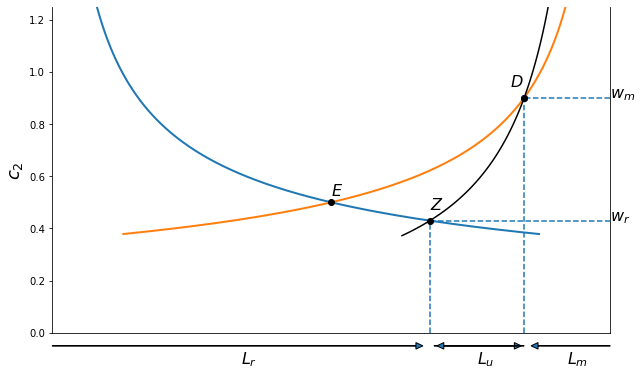

In [7]:
HTplot(wm = 0.9, wu = 0)

In this first scenario the effect of the manipulated urban wage is to reduce total urban employment and create an urban informal sector of the underemployed.  Rural workers are dissuaded from migrating to the cities and we end up with a larger than efficient rural sector.  

### Urban Bias

If we make the informal sector sufficiently attractive it is possible to get 'urban-bias' or an excessively small agricultural sector relative to the efficient allocation. 

For the following diagram we first make note of the efficient equilibrium wage and rural sector size:

In [9]:
WR, LR, LM, WE, LE = harristodaro(wm = 0.9, wu = 0)
print(f'Efficient competitive wage is w ={WE:5.2f} and rural employment is Lr ={LR:4.0f}')
print(f'HT distorted economy: wr = {WR:4.2f} with Lr ={LR:4.0f}, Lu ={Lbar-LR-LM:4.0f} and Lm ={LM:4.0f}')

Efficient competitive wage is w = 0.50 and rural employment is Lr = 271
HT distorted economy: wr = 0.43 with Lr = 271, Lu =  68 and Lm =  62


This is not the only possible outcome.  Suppose that workers in the informal sector do not earn zero as we have assumed above, but instead have access to low-productivity survival activities which pay a return $w_u$ larger than zero but lower than what would be the efficient market wage. In an efficient equilibrium no worker would want to work in this lower paying informal urban sector. 

However, the existence of this low-productivity option in the urban informal sector raises the expected return to migration in the Harris-Todaro distorted equilibrium by placing a floor on how far incomes will fall for those who try and fail to get modern sector jobs and end up in the informal sector. As is demonstrated below, this may result in an **urban-bias** equilibrium with excess migration, a smaller than efficient rural sector, and a large urban informal sector:

(wm, wr, wu) = (0.90, 0.56, 0.45); gdp loss = 8%  Urban Bias


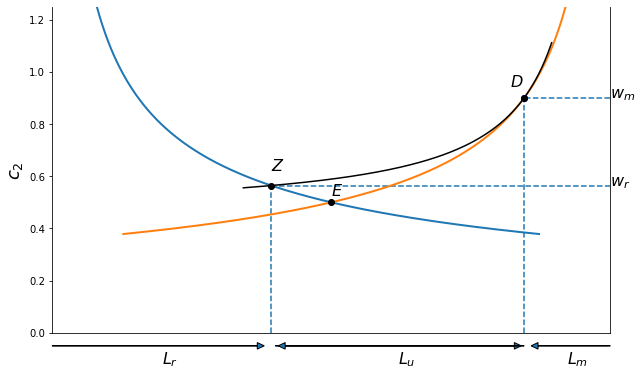

In [11]:
HTplot(wm = 0.9, wu = 0.45)

In [12]:
WR, LR, LM, WE, LE = harristodaro(wm = 0.9, wu = 0.5)
print(f'Efficient competitive wage is w ={WE:5.2f} and rural employment is Lr ={LR:4.0f}')
print(f'HT distorted economy: wr = {WR:4.2f} with Lr ={LR:4.0f}, Lu ={Lbar-LR-LM:4.0f} and Lm ={LM:4.0f}')

Efficient competitive wage is w = 0.50 and rural employment is Lr = 141
HT distorted economy: wr = 0.60 with Lr = 141, Lu = 197 and Lm =  62
